In [62]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [63]:
df =pd.read_csv("D:\java repository\R5D5-Project-dev\model\ML_Model_Dataset_01\complete_data_model_nba2k_main_data_sheet.csv").dropna()

In [64]:
df.head()

,rating,height,weight,salary,draft_year,draft_round,draft_peak,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,TWITTER_FOLLOWER_COUNT_MILLIONS,...,team_salary,position_C,position_C-F,position_F,position_F-C,position_F-G,position_G,position_G-F,country_USA,country_not USA
0,81,2.03,99.8,0.433265,2014,1,4,42.500000,16.000000,2.850071,...,4,0,0,1,0,0,0,0,1,0
1,73,1.83,83.9,0.047871,2018,1,23,583.257282,198.997573,2.850071,...,2,0,0,0,0,0,1,0,1,0
2,70,1.96,102.1,0.034299,2016,2,58,583.257282,198.997573,2.850071,...,6,0,0,1,0,0,0,0,0,1
3,71,1.96,109.3,0.020774,2019,2,42,583.257282,198.997573,2.850071,...,6,0,0,1,0,0,0,0,1,0
4,85,2.06,111.6,0.611183,2007,1,3,136.000000,71.000000,0.253000,...,6,0,1,0,0,0,0,0,0,1


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

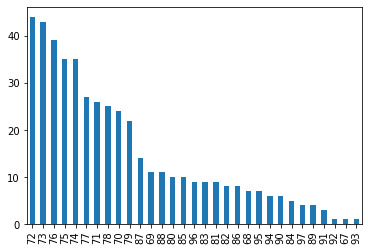

In [65]:
df['rating'].value_counts().plot(kind='bar')
sns.despine

<function matplotlib.pyplot.show(close=None, block=None)>

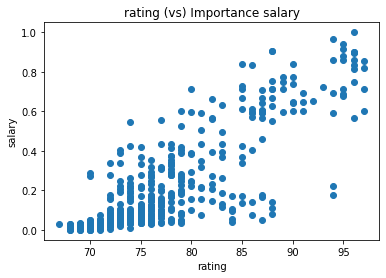

In [66]:
plt.scatter(df.rating,df.salary)
plt.xlabel('rating')
plt.ylabel('salary')
plt.title('rating (vs) Importance salary')
plt.show

In [67]:
train = df.drop(['draft_year','salary'], axis=1)

In [68]:
train.head()

,rating,height,weight,draft_round,draft_peak,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,TWITTER_FOLLOWER_COUNT_MILLIONS,Experience,Age,...,team_salary,position_C,position_C-F,position_F,position_F-C,position_F-G,position_G,position_G-F,country_USA,country_not USA
0,81,2.03,99.8,1,4,42.500000,16.000000,2.850071,9.0,28.0,...,4,0,0,1,0,0,0,0,1,0
1,73,1.83,83.9,1,23,583.257282,198.997573,2.850071,5.0,27.0,...,2,0,0,0,0,0,1,0,1,0
2,70,1.96,102.1,2,58,583.257282,198.997573,2.850071,7.0,30.0,...,6,0,0,1,0,0,0,0,0,1
3,71,1.96,109.3,2,42,583.257282,198.997573,2.850071,4.0,26.0,...,6,0,0,1,0,0,0,0,1,0
4,85,2.06,111.6,1,3,136.000000,71.000000,0.253000,16.0,37.0,...,6,0,1,0,0,0,0,0,0,1


In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
reg = LinearRegression()

In [71]:
labels = df['salary']
conv_date = [1 if values == 2014 else 0 for values in df.Age]
df['Age'] = conv_date
train = df.drop(['draft_year','salary'],axis=1)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# see below

In [74]:
#------------------------------------------------------------------

In [75]:
X_train = pd.read_csv("D:\java repository\R5D5-Project-dev\model\ML_Model_Dataset_02\X_train02.csv")
y_train =pd.read_csv("D:\java repository\R5D5-Project-dev\model\ML_Model_Dataset_02\y_train02.csv")
X_test = pd.read_csv("D:\java repository\R5D5-Project-dev\model\ML_Model_Dataset_01\X_test.csv")
y_test = pd.read_csv("D:\java repository\R5D5-Project-dev\model\ML_Model_Dataset_01\y_test.csv")
x = X_train[['Stamina', 'Layup', 'Hands', 'Pass Accuracy', 'Pass IQ', 'Pass Vision']]
y= y_train ['salary']

In [76]:
#baseline model
crossvalidation = KFold(n_splits = 10,shuffle=True , random_state=1)

for depth in range(1,11):
    tree_regressor=tree.DecisionTreeRegressor(max_depth=depth,random_state=1)
    if tree_regressor.fit(x,y).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_regressor,x,y,
                                 scoring='neg_mean_squared_error',
                                 cv=crossvalidation,n_jobs=1))
    print(depth,score)

1 -0.09209756389636131
2 -0.09982194486850277
3 -0.10015586796831226
4 -0.11765000740891252
5 -0.1308753069463339
6 -0.1338566922478276
7 -0.1561134890058677
8 -0.13618395320556007
9 -0.14556745696668655
10 -0.16016429498794774


In [77]:
#hyperparamete tuning
GBR =GradientBoostingRegressor()
search_grid = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],
              'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
search = GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)

In [78]:
search.fit(x,y)
print(search.best_params_)
print(search.best_score_)

{'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 2000, 'random_state': 1, 'subsample': 0.5}
-0.07439469892656139


In [79]:
#GB mosdel development
GBR2 = GradientBoostingRegressor(learning_rate = 0.001, max_depth= 1, n_estimators=2000, random_state= 1, subsample= 0.5)
score = np.mean(cross_val_score(GBR2,x,y,scoring = 'neg_mean_squared_error',cv=crossvalidation,n_jobs=1))
score


-0.07439469892656139

In [80]:
X_train,X_test,y_train,y_test = train_test_split(train,labels,test_size=0.1,random_state=2)

In [81]:
reg.fit(X_train,y_train)

LinearRegression()

In [82]:
score = reg.score(X_test,y_test)
print("R² score:", score)
# Check if the score is above a certain threshold
# Print the R² score and the prediction quality

if score > 0.7:
    print("Good prediction")
elif score > 0.5:
    print("Fair prediction")
else:
    print("Poor prediction")

R² score: 0.6818317973848416
Fair prediction


In [83]:
from sklearn import ensemble

In [84]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 200,max_depth=10,min_samples_split=2,learning_rate=0.1,loss='ls')

In [85]:
gbr.fit(X_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(loss='ls', max_depth=10, n_estimators=200)

In [86]:
gbr.score(X_test,y_test)

0.7107486927099023

In [87]:
y_pred =gbr.predict(X_test)
y_pred

array([0.22553935, 0.25210171, 0.0821711 , 0.60035102, 0.07699671,
       0.51246724, 0.65675157, 0.10570389, 0.05024056, 0.03603834,
       0.75906931, 0.25707777, 0.83832491, 0.32930098, 0.17396065,
       0.03004528, 0.85926241, 0.03425745, 0.24764596, 0.29241686,
       0.22919086, 0.17361336, 0.10160176, 0.03509109, 0.05008161,
       0.03450716, 0.17072954, 0.07562734, 0.59069928, 0.27706138,
       0.23201642, 0.38508045, 0.13564415, 0.24511875, 0.96784886,
       0.12254271, 0.75906931, 0.05567501, 0.01068035, 0.23795547,
       0.06296452, 0.04530812, 0.64490237, 0.05813515, 0.0785997 ,
       0.66843428, 0.06407796])

In [88]:
X_test[0:1]

,rating,height,weight,draft_round,draft_peak,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,TWITTER_FOLLOWER_COUNT_MILLIONS,Experience,Age,...,team_salary,position_C,position_C-F,position_F,position_F-C,position_F-G,position_G,position_G-F,country_USA,country_not USA
274,74,2.06,104.3,1,30,22.0,11.5,2.850071,9.0,0,...,2,0,0,1,0,0,0,0,1,0


In [89]:
from sklearn import ensemble
gbr = ensemble.GradientBoostingRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    learning_rate=.001,
    loss='squared_error'
)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.001, max_depth=10, n_estimators=200)

In [90]:
gbr.score(X_test,y_test)

0.26121149230821006

In [91]:
y_pred =gbr.predict(X_test)
y_pred
X_test[0:1]

,rating,height,weight,draft_round,draft_peak,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,TWITTER_FOLLOWER_COUNT_MILLIONS,Experience,Age,...,team_salary,position_C,position_C-F,position_F,position_F-C,position_F-G,position_G,position_G-F,country_USA,country_not USA
274,74,2.06,104.3,1,30,22.0,11.5,2.850071,9.0,0,...,2,0,0,1,0,0,0,0,1,0
